In [1]:
import numpy as np
import pandas as pd
from __future__ import unicode_literals
from sklearn.model_selection import KFold 
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from hazm import *

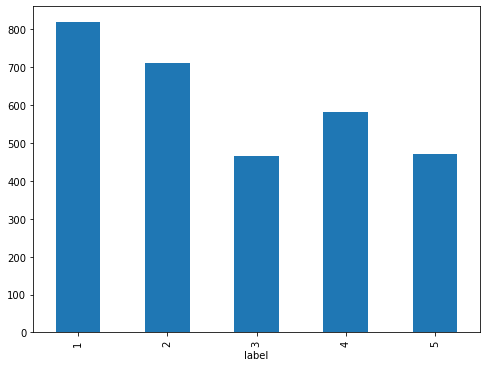

train shape: (3048, 3)


,id,query,label
0,0,شرایط حذف ترم چیه؟,1
1,1,از کجا می تونم با دکتر وحیدی ارتباط برقرار کنم؟,2
2,2,بوفه برداران تا ساعت چند باز است؟,2
3,3,کمترین تعداد واحد چند عدد است؟,1
4,4,سنگ جامد است,5
5,5,سرورای دانشکده مشکل دارن؟,3
6,6,کلاس آزمایشگاه فیزیک در دانشکده خودمان برگزار ...,2
7,7,شرایط حذف پزشکی چیه؟,1
8,8,در شرایطی ساعت و روز کلاسی جابجا می شود؟,1
9,9,سطل آشغال در کلاس 101 وجود ندارد.,4


In [2]:
train = pd.read_csv('datasets/train.csv')

fig = plt.figure(figsize=(8,6))
train.groupby('label').query.count().plot.bar(ylim=0)
plt.show()

print("train shape: {}".format(train.shape))
train.head(10)

## Preprocessing

In this part we hve cleaned the train data using hazm library. Otherwise some parts like removing special characters an stop words were implemented without getting help from any library.

In [3]:
class Preprocess:
    stop_words=['تر','و','در','به','از','که','این','را','با','است','برای','آن','یک','خود','تا','کرد','بر','هم','نیز','گفت','وی','شد','دارد','ما','اما','یا','شده','باید','هر','آنها','بود','او','یگر','دو','مورد','شود','کند','وجود','بین','پیش','شده_است','پس','نظر','اگر','همه','یکی','حال','هستند','من','کنند','نیست','باشد','چه','بی','می','بخش','همین','افزود','هایی','دارند','راه','همچنین','روی','داد','بیشتر','بسیار','سه','داشت','چند','سوی','تنها','هیچ','میان','اینکه','شدن','بعد','جدید','ولی','حتی','کردن','برخی','کردند','اول','نه','کرده_است','نسبت','بیش','شما','چنین','طور','افراد','تمام','درباره','بار','بسیاری','کرده','چون','ندارد','دوم','بزرگ','طی','حدود','همان','بدون','البته','آنان','دیگری','خواهد_شد','کنیم','قابل','یعنی','رشد','وارد','کل','ویژه','قبل','براساس','نیاز','گذاری','هنوز','لازم','سازی','بوده_است','چرا','وقتی','گرفت','کم','جای','حالی','تغییر','پیدا','اکنون','تحت','باعث','مدت','فقط','زیادی','تعداد','آیا','بیان','رو','شدند','عدم','کرده_اند','بودن','نوع','بلکه','جاری','دهد','برابر','مهم','بوده','اخیر','مربوط','امر','زیر','گیری','شاید','خصوص','آقای','اثر','کننده','بودند','فکر','کنار','اولین','سوم','سایر','کنید','ضمن','مانند','باز','ممکن','حل','دارای','پی','مثل','اجرا','دور','منظور','کسی','موجب','طول','امکان','آنچه','تعیین','گفته','شوند','جمع','خیلی','علاوه','گونه','تاکنون','رسید','ساله','گرفته','شده_اند','علت','چهار','داشته_باشد','خواهد_بود','طرف','تهیه','تبدیل','مناسب','زیرا','مشخص','نزدیک','جریان','روند','بنابراین','یافت','نخستین','بالا','پنج','ریزی','عالی','چیزی','نخست','بیشتری','ترتیب','شده_بود','خاص','خوبی','خوب','شروع','فرد','کامل','غیر','دهند','آخرین','دادن','جدی','بهترین','شامل','گیرد','بخشی','باشند','تمامی','بهتر','داده_است','حد','نبود','کسانی','داریم','علیه','دانست','ناشی','داشتند','دهه','ایشان','آنجا','گرفته_است','دچار','لحاظ','آنکه','داده','بعضی','هستیم','اند','برداری','نباید','نشست','سهم','همیشه','آمد','اش','وگو','حداقل','طبق','جا','خواهد_کرد','نوعی','چگونه','رفت','هنگام','فوق','روش','ندارند','سعی','بندی','شمار','کلی','کافی','مواجه','همچنان','زیاد','سمت','کوچک','داشته_است','چیز','پشت','آورد','حالا','روبه','دادند','عهده','نیمه','جایی','دیگران','سی','بروز','یکدیگر','آمده_است','جز','کنم','سپس','کنندگان','خودش','چیه','چیست','همواره','یافته','شان','صرف','رسیدن','چهارم','یابد','متر','ساز','داشته','کرده_بود','باره','نحوه','کردم','تو','شخصی','داشته_باشند','محسوب','پخش','کمی','متفاوت','سراسر','کاملا','داشتن','نظیر','آمده','گروهی','فردی','ع','همچون','خطر','خویش','کدام','دسته','سبب','عین','آوری','متاسفانه','بیرون','دار','ابتدا','شش','افرادی','سالهای','درون','نیستند','یافته_است','تو','هام','پر','خاطرنشان','گاه','','جمعی','اغلب','دوباره','لذا','زاده','فر','گردد','اینجا']
    normalizer = Normalizer()
    tokenizer = WordTokenizer(join_verb_parts=False)
    informal_normalizer = InformalNormalizer()
    stemmer = Stemmer()
    lemmatizer = Lemmatizer()
    
    def remove_special_chars(self,text):
        chars=['0','1','2','3','4','5','6','7','8','9','"',"'",'=','@','&','%','.',',',':','\\','$','^','<','>','!','؟','،','.',':','!','?','{','}',';','\n','\t','(',')','[',']','/','*','+','#','\u200c','\ufeff','-','_','|','۱','۲','۳','۴','۵','۶','۷','۸','۹','۰','،']
        for item in chars:
            text=text.replace(item,"")
        return text 
    
    def clean_text(self, text):
        cleaned_text = self.normalizer.punctuation_spacing(text)
        cleaned_text = self.normalizer.affix_spacing(cleaned_text)
        cleaned_text = self.normalizer.character_refinement(cleaned_text)
        cleaned_text = self.remove_special_chars(cleaned_text)
        cleaned_text = self.normalizer.normalize(cleaned_text)
        
        
        return cleaned_text

    def make_tokens(self, text):
        tokenized = [self.lemmatizer.lemmatize(token)
                    for token in self.tokenizer.tokenize(text) 
                    if token not in self.stop_words]
        return tokenized


## Model
Actually this function is the main and most important part of our project.
First of all this function is grouping our data by labels wich now questions are cleaned and tokenized, then for each class this function make a bag of words, its a list containing all words wich have occured in questions of that class.
After that we make a dataframe indexed by individual words of our dataset that shows howmany times each word has seeen in each class, this table is named condition_prob and it will be very useful when we're going to calcolate the probability of test data in Naive Bayes classifier.


In [4]:
def make_occurrence_table(data):
    bag_of_words = data.groupby('label').aggregate({'tokens' : 'sum'})
    
    words = set()
    for token in bag_of_words['tokens']:
        words.update(set(token))
    
    condition_prob = pd.DataFrame(0, columns=range(1,6) , index=list(words))
    for label in range(1,6):
        for word in bag_of_words.loc[label, 'tokens']:
            condition_prob.loc[word,label] += 1 
            
    return condition_prob, words
    

## Naive Bayes Classifier
The main purpose of this class is to predict a label for every rows of our test data, so in pridict function just choose the max value of probability of each entry and the cal_probability_each_class calculate the probabilty of each entry for input class using the Bayes' Theorem  

In [5]:
class Naive_Bayes_Classifier:
    classes_probability = {}
    x_train = 0
    condition_prob = 0
    words = 0
    
    def __init__(self, X, cond_prob, words):
        self.x_train = X
        self.condition_prob = cond_prob
        self.words = words
        self.cal_class_prob()
        
    def cal_class_prob(self):
        for i in range(1,6):
            self.classes_probability[i] = len(self.x_train[self.x_train['label'] == i])/len(self.x_train)
            
    def cal_probability_each_class(self, i, tokens):

        prob = self.classes_probability[i]
        for t in tokens:
            if t not in list(self.words):
                cond = 0
            else:
                cond = self.condition_prob.loc[t,i]
            prob *= (cond + 1)/ (sum(self.condition_prob.loc[:,i]) + len(self.condition_prob.loc[:,i] != 0))
        return prob

    def predict(self, X):
        pred_value = X.apply(lambda x: 
                    np.argmax( [self.cal_probability_each_class(i,x['tokens'] ) 
                                for i in range(1,6)]) + 1, axis=1)
        return pred_value
        


## Predict validation
Finally in this part just we have to split our train data three times in different wayesand affter that our model using the train data then using previous implementations we predict labels for test data and for ech prediction we calculate precision, recall and fscore. At the end just we return the average score 

### precision 
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.

### recall
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.

### F-score
The F-score can be interpreted as a weighted harmonic mean of the precision and recall.

In [6]:
def k_fold_validation(k, data):
    
    kfold = KFold(n_splits=k, random_state=None)
    score = []
 
    for train_index , test_index in kfold.split(train[['tokens']]):
    
        X_train , X_test = train[['tokens','label']].iloc[train_index] , train[['tokens','label']].iloc[test_index]
        y_train , y_test = train['label'].iloc[train_index] , train['label'].iloc[test_index]
    
        condition_prob, words = make_occurrence_table(X_train)
        classifier = Naive_Bayes_Classifier(X_train, condition_prob, words)
    
        y_pred = classifier.predict(X_test)
        score.append(precision_recall_fscore_support(y_pred , y_test, average='weighted'))
   
    avg_prec_score = sum([ i[0] for i in score])/k 
    avg_recall_score = sum([ i[1] for i in score])/k 
    avg_fscore_score = sum([ i[2] for i in score])/k 
    
    return avg_prec_score, avg_recall_score, avg_fscore_score

In [7]:
preprocess = Preprocess()
train['query'] = train.apply(lambda x: preprocess.clean_text(x['query']) , axis = 1)
train['tokens'] = train.apply(lambda x: preprocess.make_tokens(x['query']) , axis = 1)

avg_prec_score, avg_recall_score, avg_fscore_score = k_fold_validation(3, train)

print('Avg precision : {}'.format(avg_prec_score))
print('Avg recall : {}'.format(avg_recall_score))
print('Avg fscore : {}'.format(avg_fscore_score))

Avg precision : 0.7689604178100011
Avg recall : 0.7388451443569554
Avg fscore : 0.7454038433951


In [8]:
def prediction_result_to_csv(file_path):
    preprocess = Preprocess()
    test = pd.read_csv(file_path)
    
    test['query'] = test.apply(lambda x: preprocess.clean_text(x['query']) , axis = 1)
    test['tokens'] = test.apply(lambda x: preprocess.make_tokens(x['query']) , axis = 1)
    
    condition_prob, words = make_occurrence_table(train)
    classifier = Naive_Bayes_Classifier(train, condition_prob, words)
    
    y_pred = classifier.predict(test) 
    y_test = test['label']
    
    result_df = pd.DataFrame({'id':test['id'],'label':y_pred})    
    result_df.to_csv("sample1 - task1.csv",index=False)
    
    return result_df, condition_prob, y_test

prediction, condition_prob, y_test = prediction_result_to_csv('datasets/inference.csv')
condition_prob

,1,2,3,4,5
خصوصی,0,0,0,1,0
اعتراض,5,0,0,1,1
شیوه,0,0,0,1,0
میگن,0,1,0,0,2
دوران,0,0,0,0,1
...,...,...,...,...,...
سطح,0,1,1,10,3
خونه,0,1,1,0,1
اسانسور,0,1,0,2,0
انتقال,1,0,0,0,0


precision: 0.7718039215686275
recall: 0.76
fscore: 0.7471630591630591


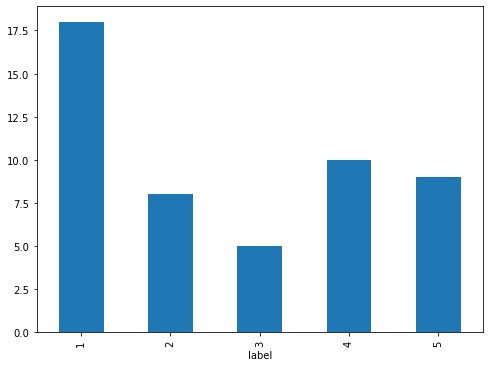

,id,label
0,0,4
1,1,1
2,2,4
3,3,1
4,4,5
5,5,5
6,6,3
7,7,4
8,8,4
9,9,5


In [9]:
metrics_score = precision_recall_fscore_support(prediction['label'] , y_test, average='weighted')
print('precision: '+ str(metrics_score[0]))
print('recall: '+ str(metrics_score[1]))
print('fscore: '+ str(metrics_score[2]))

fig = plt.figure(figsize=(8,6))
prediction.groupby('label').id.count().plot.bar(ylim=0)
plt.show()

prediction